Import Libraries

In [16]:
import csv
from pprint import pprint
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd

Functions

In [17]:
def cart2pol(x, y):
    rho = np.sqrt(x**2 + y**2)
    phi = np.arctan2(y, x)
    return(rho, phi)

def pol2cart(rho, phi):
    x = rho * np.cos(phi)
    y = rho * np.sin(phi)
    return(x, y)

# THIS IS A FUNCITON YOU CAN CALL FROM OTHER PLACES TO GET THE DATA 
def CSV_Read_Lidar_data(data_path):
    rows = []
    with open(data_path, 'r') as file:
        csvreader = csv.reader(file)
        header = next(csvreader)
        for row in csvreader:
            rows.append(row)
    return header, rows

Read the CSV File

In [18]:
rows = []
file_path = 'Data/'
file_name = 'RISLHallway'
with open(file_path+file_name + '.csv', 'r') as file:
    csvreader = csv.reader(file)
    header = next(csvreader)
    for row in csvreader:
        rows.append(row)
print("test")

headers = np.array(header).T


test


Create pd Series and DataFrames

In [19]:
# Create a Series for the header
header_names = ['angle_min', 'angle_max', 'angle_increment', 'time_increment', 'scan_time', 'range_min', 'range_max']
Header_info = pd.DataFrame(headers, header_names).astype(float)
Header_info

,0
angle_min,-3.124139
angle_max,3.141593
angle_increment,0.005807
time_increment,0.000125
scan_time,0.134861
range_min,0.150000
range_max,12.000000


In [31]:
# create a lidar rho dataframe
translation_df = pd.DataFrame(np.array(rows[3::5]))
translation_df = translation_df.T.astype(float)
abs(translation_df.iloc[0])

0     0.903530
1     0.903530
2     1.034113
3     1.164791
4     1.289719
5     1.385574
6     1.425139
7     1.552853
8     1.644235
9     1.798317
10    1.897852
11    1.954915
12    2.042243
13    2.158184
14    2.266024
15    2.351495
16    2.460845
17    2.609595
18    2.654237
19    2.761606
20    2.879658
21    2.981599
22    3.026532
23    3.171817
24    3.333256
25    3.379989
26    3.501409
27    3.598931
28    3.643406
29    3.747333
30    3.910126
31    4.058232
32    4.096108
33    4.171157
34    4.247073
35    4.364050
36    4.424369
Name: 0, dtype: float64

In [32]:
# create a lidar rho dataframe
rho_df = pd.DataFrame(np.array(rows[1::5]))
rho_df = rho_df.T
rho_df

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
0,1.3639999628067017,1.3639999628067017,1.3619999885559082,1.3600000143051147,1.3600000143051147,1.3580000400543213,1.3600000143051147,1.3580000400543213,1.3580000400543213,1.3580000400543213,...,4.736000061035156,4.74399995803833,4.74399995803833,4.736000061035156,4.736000061035156,4.74399995803833,4.74399995803833,4.74399995803833,4.74399995803833,4.751999855041504
1,1.3639999628067017,1.3639999628067017,1.3619999885559082,1.3619999885559082,1.3600000143051147,1.3580000400543213,1.3580000400543213,1.3580000400543213,1.3580000400543213,1.3580000400543213,...,4.736000061035156,4.74399995803833,4.74399995803833,4.74399995803833,4.74399995803833,4.74399995803833,4.74399995803833,4.751999855041504,4.74399995803833,4.751999855041504
2,1.3660000562667847,1.3639999628067017,1.3639999628067017,1.3619999885559082,1.3600000143051147,1.3580000400543213,1.3580000400543213,1.3580000400543213,1.3580000400543213,1.3580000400543213,...,4.74399995803833,4.74399995803833,4.74399995803833,4.74399995803833,4.74399995803833,4.74399995803833,4.74399995803833,4.751999855041504,4.751999855041504,4.751999855041504
3,1.3639999628067017,1.3639999628067017,1.3639999628067017,1.3619999885559082,1.3600000143051147,1.3580000400543213,1.3580000400543213,1.3580000400543213,1.3580000400543213,1.3580000400543213,...,4.74399995803833,4.74399995803833,4.74399995803833,4.74399995803833,4.74399995803833,4.74399995803833,4.74399995803833,4.751999855041504,4.751999855041504,4.751999855041504
4,1.3660000562667847,1.3639999628067017,1.3639999628067017,1.3600000143051147,1.3600000143051147,1.3580000400543213,1.3600000143051147,1.3580000400543213,1.3580000400543213,1.3580000400543213,...,4.74399995803833,4.74399995803833,4.74399995803833,4.74399995803833,4.74399995803833,4.74399995803833,4.74399995803833,4.74399995803833,4.751999855041504,4.751999855041504
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,1.3639999628067017,1.3639999628067017,1.3619999885559082,1.3619999885559082,1.3619999885559082,1.3600000143051147,1.3600000143051147,1.3580000400543213,1.3580000400543213,1.3580000400543213,...,4.5920000076293945,4.74399995803833,4.736000061035156,4.74399995803833,4.74399995803833,4.751999855041504,4.74399995803833,4.751999855041504,4.751999855041504,4.751999855041504
1076,1.3639999628067017,1.3639999628067017,1.3619999885559082,1.3619999885559082,1.3619999885559082,1.3580000400543213,1.3600000143051147,1.3580000400543213,1.3580000400543213,1.3580000400543213,...,4.688000202178955,4.74399995803833,4.736000061035156,4.74399995803833,4.74399995803833,4.751999855041504,4.74399995803833,4.751999855041504,4.751999855041504,4.751999855041504
1077,1.3619999885559082,1.3639999628067017,1.3639999628067017,1.3619999885559082,1.3600000143051147,1.3580000400543213,1.3600000143051147,1.3580000400543213,1.3580000400543213,1.3580000400543213,...,4.688000202178955,4.74399995803833,4.736000061035156,4.74399995803833,4.74399995803833,4.74399995803833,4.751999855041504,4.751999855041504,4.751999855041504,4.74399995803833
1078,1.3639999628067017,1.3619999885559082,1.3639999628067017,1.3619999885559082,1.3600000143051147,1.3580000400543213,1.3600000143051147,1.3580000400543213,1.3580000400543213,1.3580000400543213,...,4.751999855041504,4.751999855041504,4.736000061035156,4.74399995803833,4.74399995803833,4.74399995803833,4.751999855041504,4.751999855041504,4.751999855041504,4.74399995803833


In [33]:
def flatten_extend(matrix):
    flat_list = []
    for row in matrix:
        flat_list.extend(row)
    return flat_list

index_tb_poles = []
for i in range(0, rho_df.shape[1]):
    del_indexes = np.array(list(rho_df[i][rho_df[i].astype(float) <= 0.3].index))
    del_indexes = del_indexes + (1080 * i)
    index_tb_poles.append(del_indexes)
# for i in range(num_rows):
#     index_tb_poles.append(del_indexes + (1080 * i))
tb_pole_indexes = flatten_extend(index_tb_poles)
np.array(tb_pole_indexes)

array([39119, 39120, 39121, 39122, 39123, 39124, 39125, 39126, 39127,
       39128, 39129, 39130, 39131, 39132, 39133, 39134, 39135, 39136,
       39137, 39138, 39139, 39140, 39141, 39142, 39143, 39144])

In [23]:
# rho_df = rho_df.transpose().drop(del_indexes, axis=1).transpose()

In [34]:
# create a dataframe of the radian alphas
alpha_df = pd.DataFrame()

for i in range(rho_df.shape[1]):
    # alpha_df[i] = Header_info.loc['angle_increment'][0] * np.arange(1, 1081)
    alpha_df[i] = Header_info.loc['angle_increment'][0] * np.arange(1, 1081) - math.pi/2
alpha_df

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
0,-1.564989,-1.564989,-1.564989,-1.564989,-1.564989,-1.564989,-1.564989,-1.564989,-1.564989,-1.564989,...,-1.564989,-1.564989,-1.564989,-1.564989,-1.564989,-1.564989,-1.564989,-1.564989,-1.564989,-1.564989
1,-1.559182,-1.559182,-1.559182,-1.559182,-1.559182,-1.559182,-1.559182,-1.559182,-1.559182,-1.559182,...,-1.559182,-1.559182,-1.559182,-1.559182,-1.559182,-1.559182,-1.559182,-1.559182,-1.559182,-1.559182
2,-1.553375,-1.553375,-1.553375,-1.553375,-1.553375,-1.553375,-1.553375,-1.553375,-1.553375,-1.553375,...,-1.553375,-1.553375,-1.553375,-1.553375,-1.553375,-1.553375,-1.553375,-1.553375,-1.553375,-1.553375
3,-1.547568,-1.547568,-1.547568,-1.547568,-1.547568,-1.547568,-1.547568,-1.547568,-1.547568,-1.547568,...,-1.547568,-1.547568,-1.547568,-1.547568,-1.547568,-1.547568,-1.547568,-1.547568,-1.547568,-1.547568
4,-1.541761,-1.541761,-1.541761,-1.541761,-1.541761,-1.541761,-1.541761,-1.541761,-1.541761,-1.541761,...,-1.541761,-1.541761,-1.541761,-1.541761,-1.541761,-1.541761,-1.541761,-1.541761,-1.541761,-1.541761
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,4.677514,4.677514,4.677514,4.677514,4.677514,4.677514,4.677514,4.677514,4.677514,4.677514,...,4.677514,4.677514,4.677514,4.677514,4.677514,4.677514,4.677514,4.677514,4.677514,4.677514
1076,4.683321,4.683321,4.683321,4.683321,4.683321,4.683321,4.683321,4.683321,4.683321,4.683321,...,4.683321,4.683321,4.683321,4.683321,4.683321,4.683321,4.683321,4.683321,4.683321,4.683321
1077,4.689128,4.689128,4.689128,4.689128,4.689128,4.689128,4.689128,4.689128,4.689128,4.689128,...,4.689128,4.689128,4.689128,4.689128,4.689128,4.689128,4.689128,4.689128,4.689128,4.689128
1078,4.694935,4.694935,4.694935,4.694935,4.694935,4.694935,4.694935,4.694935,4.694935,4.694935,...,4.694935,4.694935,4.694935,4.694935,4.694935,4.694935,4.694935,4.694935,4.694935,4.694935


In [35]:
# Get the x and y coodinates of the dataframe (in a new dataframe)
cartesian_df = pd.DataFrame()
dist_between_scans = 0.1 # distance between each lidar scan
index = 0
for i in range(rho_df.shape[1]):
    x, y = pol2cart(rho_df[i].astype(float), alpha_df[i].astype(float))
    x += dist_between_scans * i # corrects the offset between 
    cartesian_df[index] = x
    index += 1 # this is just to make the index numbers up
    cartesian_df[index] = y
    index += 1
cartesian_df

,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,72,73
0,0.007921,-1.363977,0.007921,-1.263977,0.007909,-1.161977,0.007897,-1.059977,0.007897,-0.959977,...,0.027548,-1.543920,0.027548,-1.443920,0.027548,-1.343920,0.027548,-1.243920,0.027595,-1.151920
1,0.015841,-1.363908,0.015841,-1.263908,0.015818,-1.161908,0.015818,-1.061908,0.015795,-0.959908,...,0.055095,-1.543680,0.055095,-1.443680,0.055188,-1.351679,0.055095,-1.243680,0.055188,-1.151679
2,0.023796,-1.365793,0.023761,-1.263793,0.023761,-1.163793,0.023726,-1.061793,0.023691,-0.959794,...,0.082641,-1.543280,0.082641,-1.443280,0.082780,-1.351279,0.082780,-1.251279,0.082780,-1.151279
3,0.031680,-1.363632,0.031680,-1.263632,0.031680,-1.163632,0.031634,-1.061633,0.031587,-0.959633,...,0.110183,-1.542720,0.110183,-1.442720,0.110369,-1.350718,0.110369,-1.250718,0.110369,-1.150718
4,0.039656,-1.365424,0.039598,-1.263425,0.039598,-1.163425,0.039482,-1.059427,0.039482,-0.959427,...,0.137722,-1.542000,0.137722,-1.442000,0.137722,-1.342000,0.137954,-1.249997,0.137954,-1.149997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,-0.047559,-1.363171,-0.047559,-1.263171,-0.047490,-1.161172,-0.047490,-1.061172,-0.047490,-0.961172,...,-0.165691,-1.549110,-0.165412,-1.441115,-0.165691,-1.349110,-0.165691,-1.249110,-0.165691,-1.149110
1076,-0.039643,-1.363424,-0.039643,-1.263424,-0.039585,-1.161425,-0.039585,-1.061425,-0.039585,-0.961425,...,-0.138110,-1.549992,-0.137877,-1.441996,-0.138110,-1.349992,-0.138110,-1.249992,-0.138110,-1.149992
1077,-0.031678,-1.361632,-0.031725,-1.263631,-0.031725,-1.163631,-0.031678,-1.061632,-0.031632,-0.959632,...,-0.110339,-1.542717,-0.110525,-1.450714,-0.110525,-1.350714,-0.110525,-1.250714,-0.110339,-1.142717
1078,-0.023806,-1.363792,-0.023771,-1.261793,-0.023806,-1.163792,-0.023771,-1.061793,-0.023736,-0.959793,...,-0.082796,-1.543277,-0.082936,-1.451276,-0.082936,-1.351276,-0.082936,-1.251276,-0.082796,-1.143277


In [36]:
# Combine in to 1 value
all_cart_datax = pd.DataFrame()
all_cart_datay = pd.DataFrame()

for i in range(int(len(cartesian_df.columns)/2)):
    # combine all x values
    all_cart_datax = pd.concat([all_cart_datax, cartesian_df[i*2]])
    all_cart_datax = all_cart_datax.reset_index()[0]

for i in range(1, int(len(cartesian_df.columns)), 2):   
    # combine all y values
    all_cart_datay = pd.concat([all_cart_datay, cartesian_df[i]])
    all_cart_datay = all_cart_datay.reset_index()[0]

all_cart_data = pd.DataFrame([all_cart_datax, all_cart_datay], ['X', 'Y'])
all_cart_data

,0,1,2,3,4,5,6,7,8,9,...,39950,39951,39952,39953,39954,39955,39956,39957,39958,39959
X,0.007921,0.015841,0.023796,0.031680,0.039656,0.047654,0.055592,0.063529,0.071463,0.079395,...,-0.303491,-0.275948,-0.248395,-0.220462,-0.193266,-0.165691,-0.138110,-0.110339,-0.082796,-0.055344
Y,-1.363977,-1.363908,-1.365793,-1.363632,-1.365424,-1.367170,-1.366870,-1.366524,-1.366132,-1.365694,...,-1.142299,-1.143981,-1.145503,-1.138875,-1.148068,-1.149110,-1.149992,-1.142717,-1.143277,-1.151678


In [27]:
# Now convert that back to alpha and rho
alpha_rho_df = pd.DataFrame(cart2pol(all_cart_data.loc['X'], all_cart_data.loc['Y']), ['Rho', 'Alpha'])
alpha_rho_df

,0,1,2,3,4,5,6,7,8,9,...,39950,39951,39952,39953,39954,39955,39956,39957,39958,39959
Rho,0.903530,9.294270,0.445369,0.000582,0.001632,0.475385,0.879776,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alpha,1.576603,-1.559182,-1.553375,-1.547568,-1.541761,1.605638,-1.530147,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
#Finally combine the xy data and alpha rho data
all_data_df = pd.concat([alpha_rho_df, all_cart_data])
all_data_df = all_data_df.drop(tb_pole_indexes, axis=1)
# all_data_df = all_data_df.T.iloc[::6, :].T
all_data_df

,0,1,2,3,4,5,6,7,8,9,...,39950,39951,39952,39953,39954,39955,39956,39957,39958,39959
Rho,0.903530,9.294270,0.445369,0.000582,0.001632,0.475385,0.879776,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alpha,1.576603,-1.559182,-1.553375,-1.547568,-1.541761,1.605638,-1.530147,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
X,0.007921,0.015841,0.023796,0.031680,0.039656,0.047654,0.055592,0.063529,0.071463,0.079395,...,-0.303491,-0.275948,-0.248395,-0.220462,-0.193266,-0.165691,-0.138110,-0.110339,-0.082796,-0.055344
Y,-1.363977,-1.363908,-1.365793,-1.363632,-1.365424,-1.367170,-1.366870,-1.366524,-1.366132,-1.365694,...,-1.142299,-1.143981,-1.145503,-1.138875,-1.148068,-1.149110,-1.149992,-1.142717,-1.143277,-1.151678


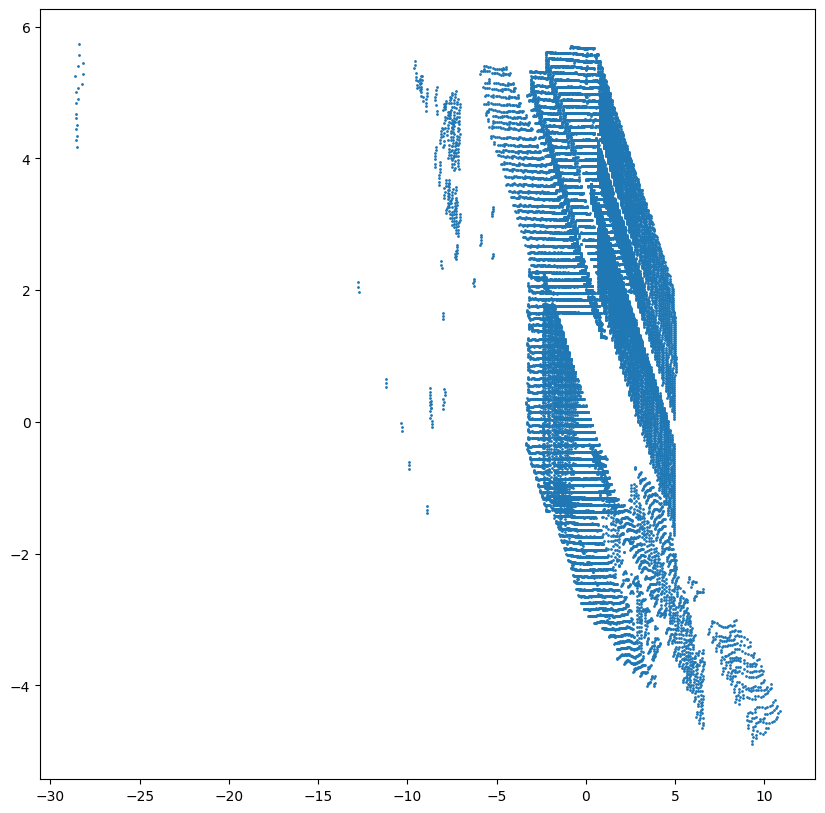

In [38]:
plt.figure(figsize=(10, 10))
plt.scatter(all_data_df.loc['X'], all_data_df.loc['Y'], s=1)
plt.show()


In [30]:
# write to csv
addition = '_GT'
with open(file_path + file_name + addition + '.csv', 'w', newline='') as file:
  writer = csv.writer(file)

  writer.writerow(all_data_df.loc['Rho'])
  writer.writerow(all_data_df.loc['Alpha'])
  writer.writerow(all_data_df.loc['X'])
  writer.writerow(all_data_df.loc['Y'])